# WLASL (World Level American Sign Language)

I am using a dataset that I downloaded from Kaggle. This dataset has 2,000 words, and over 20,000 videos of these 2,000 words in total.

## JSON Parsing and Organizing Videos/Frames

The video names represent the video-id of that video. To find out what word the video is showing, I have to find the video ID in the WLASL_v0.3.json file and see what word that video ID belongs to. The structure of the json file is as follows:

```
[
    {
        "gloss": "<word>",
        "instances": [
            {
                ...,
                ...,
                ...,
                "video_id": "<video_id_num>"
            },
            {
                ...,
                ...,
                ...,
                "video_id": "video_id_num"
            },
            ...
        ]
    },
    {
        "gloss": "<word>",
        "instances": [
            {
                ...,
                ...,
                ...,
                "video_id": "<video_id_num>"
            },
            ...
        ]
    },
    ...
]
```

To read and parse through json files, there is a json module that is downloaded alongside python. I will use this to parse through the json file and organize all the videos into their own directory in one of the three splits: Train, Test, or Validation. In addition, each video will be split into individual frames and the frames will be saved as png images. The final directory structure will look like:
```
/Videos
|--<split_type>
|   |--<word_id>
|   |   |--<instance_id>
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   ...
|   |   |--<instance_id>
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   |--<instance_id>_<frame_num>.png
|   |   |   ...
|   |   ...
|   |--<word_id>
|   ...
|...
```

In [2]:
import json

Next, I will load the json file as an object. This will make it easy to work with in python.

In [17]:
with open('WLASL/WLASL_v0.3.json', 'r') as file:
    data = json.load(file)

The json file is now loaded as an object in python

Now I will test out how this json module works and how to parse the different properties I need.

The bracket character [] represents a list, and the curly brackets {} represent objects that have name:value pairs.

The json file starts with [], which is a list of objects. Each object has a word and another list for all the instances of that word. Each instance is an object that has name:value pairs for that instance such as: video URL, video id, start time, end time, fps, and more.

The object for the first word can be accessed by accessing the first element of the list in the data json object:

In [18]:
data[0]

{'gloss': 'book',
 'instances': [{'bbox': [385, 37, 885, 720],
   'fps': 25,
   'frame_end': -1,
   'frame_start': 1,
   'instance_id': 0,
   'signer_id': 118,
   'source': 'aslbrick',
   'split': 'train',
   'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4',
   'variation_id': 0,
   'video_id': '69241'},
  {'bbox': [190, 25, 489, 370],
   'fps': 25,
   'frame_end': -1,
   'frame_start': 1,
   'instance_id': 1,
   'signer_id': 90,
   'source': 'aslsignbank',
   'split': 'train',
   'url': 'https://aslsignbank.haskins.yale.edu/dictionary/protected_media/glossvideo/ASL/BO/BOOK-418.mp4',
   'variation_id': 0,
   'video_id': '65225'},
  {'bbox': [262, 1, 652, 480],
   'fps': 25,
   'frame_end': -1,
   'frame_start': 1,
   'instance_id': 2,
   'signer_id': 110,
   'source': 'valencia-asl',
   'split': 'train',
   'url': 'https://www.youtube.com/watch?v=0UsjUE-TXns',
   'variation_id': 0,
   'video_id': '68011'},
  {'bbox': [123, 19, 516, 358],
   'fps': 25,
   'frame_end': 60,
   'frame

The number of words in this object should be 2000. Getting the length of how many dictionary objects are in the first list should result in 2000.

In [19]:
len(data)

2000

This means all the words are in the json object

To access the word, I specify the key of the value I want. In this case, the word is the value for the key called 'gloss':

In [20]:
data[0]['gloss']

'book'

So from this, the first word in the json file is 'book'

The first instance of book is then accessed by appending [0]:

In [21]:
data[0]['instances'][0]

{'bbox': [385, 37, 885, 720],
 'fps': 25,
 'frame_end': -1,
 'frame_start': 1,
 'instance_id': 0,
 'signer_id': 118,
 'source': 'aslbrick',
 'split': 'train',
 'url': 'http://aslbricks.org/New/ASL-Videos/book.mp4',
 'variation_id': 0,
 'video_id': '69241'}

The len() function can be used again here to get how many instances the word 'book' has.

In [22]:
len(data[0]['instances'])

40

The word 'book' has 40 instances.

Finally, to get the video-id to open the correct video, I use the video_id name.

In [23]:
data[0]['instances'][0]['video_id']

'69241'

This means that the video named 69241.mp4 is the video for the first instance of the word 'book'.

The same process can be used to extract the split (train, test, or validation) that this video is a part of, and how many frames are in this video clip.

note: This dataset already has the videos so there is no need to download the video again from the URL. But that would be an extra step if the dataset did not have the videos already.

Now that I know how to access the different name-value pairs, I can begin organizing the videos into train, test, and validation splits. Then, splitting the videos into frames.

### Organizing Videos:

Before getting the frames, I want to organize the videos into their own directories. This will make debugging later easier and it will make looking for the right videos easier.

To copy the video file, I first want to check if I have made the directory where the video will be saved. If a directory has not been made yet, I will create a new one and save the video to it.

To check if a directory exists, I can use the ```os.path.exists``` function. Then to create a directory, I use the ```os.makedirs``` function

In [2]:
import os

In [35]:
if not os.path.exists('./test_makedir/1/1/'):
    print(f'No directory called ./test_makeidr/1/1/. Creating one now')
    os.makedirs('./test_makedir/1/1/')

No directory called ./test_makeidr/1/1/. Creating one now


Now I can put this in a function that I will call for each video

In [36]:
def copy_video(directory_path, video_id):
    if not os.path.exists(directory_path):
        print(f'No directory called {directory_path}. Creating one now')
        os.makedirs(directory_path)

    copy_command = 'cp WLASL/videos/' + video_id + '.mp4' + ' ' + directory_path + '/' + video_id + '.mp4'
    os.system(copy_command)

Next, I want to start organizing the videos. I will go through each instance in each word and get the split type and video id. Then I will find the video with that video id and save it to one of: train directory, test directory, or validation directory.

In [37]:
def organize_words(end_word, start_word=0):
    for word_id in range(start_word, end_word):
        # List of dictionary objects for each word
        word = data[word_id]['gloss']
        train_instance = 0
        test_instance = 0
        val_instance = 0
        for instance in range(0,len(data[word_id]['instances'])):
            video_id = data[word_id]['instances'][instance]['video_id']
            split_type = data[word_id]['instances'][instance]['split']
            match split_type:
                case 'train':
                    directory_path = os.path.join(split_type, str(word_id), str(train_instance))
                    copy_video(directory_path, video_id)
                    train_instance += 1
                case 'test':
                    directory_path = os.path.join(split_type, str(word_id), str(test_instance))
                    copy_video(directory_path, video_id)
                    test_instance += 1
                case 'val':
                    directory_path = os.path.join(split_type, str(word_id), str(val_instance))
                    #if not os.path.exists(directory_path):
                    #    print(f'No directory called {directory_path}. Creating one now')
                    #    os.makedirs(directory_path)
                    #copy_command = 'cp WLASL/videos/' + video_id + '.mp4' + ' ' + directory_path + '/' + video_id + '.mp4'
                    #os.system(copy_command)
                    copy_video(directory_path, video_id)
                    val_instance += 1                       

Now I can call this and specify how many words I want to go through and where to start. For example, I will copy and organize the videos for the first 10 words:

In [38]:
organize_words(10, start_word=0)

No directory called train/0/0. Creating one now
No directory called train/0/1. Creating one now
No directory called train/0/2. Creating one now
No directory called train/0/3. Creating one now
No directory called train/0/4. Creating one now
No directory called val/0/0. Creating one now
No directory called train/0/5. Creating one now
No directory called train/0/6. Creating one now
No directory called train/0/7. Creating one now
No directory called train/0/8. Creating one now
No directory called train/0/9. Creating one now
No directory called train/0/10. Creating one now
No directory called train/0/11. Creating one now
No directory called train/0/12. Creating one now
No directory called train/0/13. Creating one now
No directory called test/0/0. Creating one now
No directory called test/0/1. Creating one now
No directory called train/0/14. Creating one now
No directory called val/0/1. Creating one now
No directory called test/0/2. Creating one now
No directory called val/0/2. Creating one 

Now, the videos for 10 words have been copied and organized into the directory structure I want. Next, I will find each video, and split it into frames

### Cropping Videos

Before doing that though, I found an issue. Some of the videos are not of the word itself, but something about the word. For example, the videos about the word 'book' are not just about book. For example, some are 'history book', 'book photography', etc... However, they all contain the sign for the word 'book' at the end of the video. So I will create a function that will crop these videos to only include the book part of the video.

This doesn't happen for all the words, so I will watch the video and see if the video includes something other than the word itself. If it does, I will use the below function to crop the video to the times that include only that word. This is the only reliable method I have found, but it should not be a problem since the videos are all between 2-4 seconds long. So not much time will be wasted.

In [3]:
import cv2

In [147]:
def crop_video_frames(video_path, start_time=0.0, end_time=0.0):
    cap = cv2.VideoCapture(video_path)
    video_path_parts = video_path.split('/')
    video_id = video_path_parts[3]
    video_dir = video_path_parts[0] + '/' + video_path_parts[1] + '/' + video_path_parts[2]
    video_output = os.path.join(f'{video_dir}', f'{video_id}_cropped.mp4')

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if start_time < 0:
        start_frame = int(frames_total + int(start_time * fps))
    else:
        start_frame = int(fps * start_time)
    
    if end_time < 0:
        end_frame = int(frames_total + int(end_time * fps))
    elif end_time == 0:
        end_frame = frames_total
    else:
        end_frame = int(fps * end_time)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    #print(str(start_frame))
    #print(str(end_frame))
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
    frame_num = start_frame
    video = cv2.VideoWriter(video_output, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    while True:
        # Read next frame
        ret, frame = cap.read()

        # If no more frames, stop.
        if not ret:
            break

        # increment frame number
        frame_num += 1

        if frame_num < end_frame:
            # Video writer to create mp4 file
            video.write(frame)

    # Release the video file
    video.release()
    cap.release()
    cv2.destroyAllWindows()
    print(f"Video generated successfully to {video_output}. Video is {end_frame - start_frame} frames long")

I will test it on one video that was about english book and grammar. The cropped videos should be the sign 'book' only.

In [154]:
crop_video_frames('train/0/6/07085.mp4', -1.8, -0.2)

Video generated successfully to train/0/6/07085.mp4_cropped.mp4. Video is 40 frames long


After watching the video, I have verified that this works.

I will create three lists: one of videos that need to be cropped, one of the begining time to crop, and one of the end crop time.

Now I will go to save the video frames

### Saving Video Frames

To save the frames, I will navigate through directory tree and find each video. Then I will call the ```save_video_frames``` function to save the frame to a new directory called frames. The new structure will look like: ```<split>/<word_id>/<instance_id>/frames/<instance_id>_<frame_num>.png```

For example, the video for the first instance of the first training word will save the first frame to: train/0/0/frames/0_0.png

To split the video into frames, I will load the video using opencv, and save each frame as a png image. The length in frames will be returned for comparison between videos

I will be passing the whole output path, so I want to extract the instance id to append to the frames file name. To do this, I will split the path and get the 3rd element which should be the instance id

In [44]:
example_string = 'train/0/1/frames'
output_str_split = example_string.split('/')
print(output_str_split)
instance_id = output_str_split[2]
print(instance_id)

['train', '0', '1', 'frames']
1


Now I will create the function to extract and save video frames.

In [119]:
def save_video_frames(video_path, output_path):
    cap = cv2.VideoCapture(video_path)

    if not os.path.exists(output_path):
        print(f'No directory called {output_path}. Creating one now')
        os.makedirs(output_path)

    frame_num = 0

    while True:
        # Read next frame
        ret, frame = cap.read()

        # If no more frames, stop.
        if not ret:
            break

        # increment frame number
        frame_num += 1

        # Save frame
        output_str_split = output_path.split('/')
        instance_id = output_str_split[2]
        frame_path = os.path.join(output_path, f'{instance_id}_{frame_num}.png')
        
        if not os.path.exists(output_path):
            print(f'No directory called {output_path}. Creating one now')
            os.makedirs(output_path)

        cv2.imwrite(frame_path, frame)

        #print(f'Frame {frame_num} has been saved to {frame_path}')
    
    # Release video capture
    cap.release()
    print(f'All {frame_num+1} frames for the video at {video_path} have been successfully saved')
    # Return how many frames make up the video
    return frame_num+1


Testing this with one video:

In [ ]:
save_video_frames('train/0/0/69241.mp4', 'train/0/0/frames')

This works. So I can use this in a loop to do this for all videos organized.

To go through a directory and find each file, I can use the ```os``` module which I already imported before.

In [ ]:
directory = 'train'
for root, dirs, files in os.walk(directory):
    for file_name in files:
        if file_name.endswith('.mp4'):
            #print(file_name, dirs, root)
            #print(os.path.join(root, file_name))
            word_id = root.split('/')[1]
            if int(word_id) >=0 and int(word_id) < 10:
                print(f'{os.path.join(root, file_name)}, word: {data[int(word_id)]["gloss"]}')

This prints the whole path for each video. I can use this to then pass the path to the save_video_frames function and save the frames of each video:

In [160]:
def save_mult_video_frames(split_type='train', start_word=0, end_word=1):
    frames = []
    for root, dirs, files in os.walk(split_type):
        for file_name in files:
            if file_name.endswith('.mp4'):
                #print(file_name, dirs, root)
                #print(os.path.join(root, file_name))
                word_id = root.split('/')[1]
                if int(word_id) >= start_word and int(word_id) < end_word:
                    video_frames = save_video_frames(f'{os.path.join(root, file_name)}', f'{os.path.join(root, "frames")}')
                    frames.append(video_frames)
                    #print(f'{os.path.join(root, file_name)}, word: {data[int(word_id)]["gloss"]}')
    return frames

To save the frames of all training videos of the first word, I can just call the function with default values.

In [161]:
frames_list = save_mult_video_frames(end_word=10)

All 57 frames for the video at train/7/17/63238.mp4 have been successfully saved
All 61 frames for the video at train/7/10/66778.mp4 have been successfully saved
All 33 frames for the video at train/7/7/63227.mp4 have been successfully saved
All 85 frames for the video at train/7/3/63239.mp4 have been successfully saved
All 55 frames for the video at train/7/1/68890.mp4 have been successfully saved
All 42 frames for the video at train/7/15/67066.mp4 have been successfully saved
All 63 frames for the video at train/7/4/63240.mp4 have been successfully saved
All 66 frames for the video at train/7/5/63241.mp4 have been successfully saved
All 36 frames for the video at train/7/8/63228.mp4 have been successfully saved
All 133 frames for the video at train/7/11/63232.mp4 have been successfully saved
All 57 frames for the video at train/7/12/66779.mp4 have been successfully saved
All 55 frames for the video at train/7/0/69534.mp4 have been successfully saved
All 80 frames for the video at tra

In [4]:
import numpy as np

In [ ]:
print(f'Frames list of all videos converted: {frames_list}')
print(f'Frames list size: {len(frames_list)}')
num_over_50 = 0
num_bw_40_50 = 0
num_less_40 = 0
for frames in frames_list:
    if frames > 50:
        num_over_50 += 1
    elif frames < 40:
        num_less_40 += 1
    else:
        num_bw_40_50 += 1
print(f'Count of videos with over 50 frames: {num_over_50}. Count of videos less than 40 frames: {num_less_40}. Count of videos between 40 and 50 frames: {num_bw_40_50}')

Next, I will need to pass these frames to mediapipe and generate the points. Then I will save these points as a numpy array to use in training.

## MediaPipe Generate Points

To get the points of the hands, face, and body pose, I need to go through all the images and then pass them to the hollistic model that is part of mediapipe. The hollistic model will return a numpy array with the data points needed. Then, I can save each array to a .npy file so that I don't have to do this everytime I want to train a model. Then when I train, I will load all the .npy arrays, and this will be my input data to the network.

The first step, is to import the mediapipe module as mp

The next step is to go through each frame and pass it to the hollistic model in mediapipe and generate the points, and then save the array

In [1]:
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

2024-11-23 13:26:34.523266: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-23 13:26:34.532651: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 13:26:34.612135: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 13:26:34.684554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732386394.749404    3941 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732386394.76

In [2]:
img_test = cv2.imread('train/0/0/frames/0_22.png')

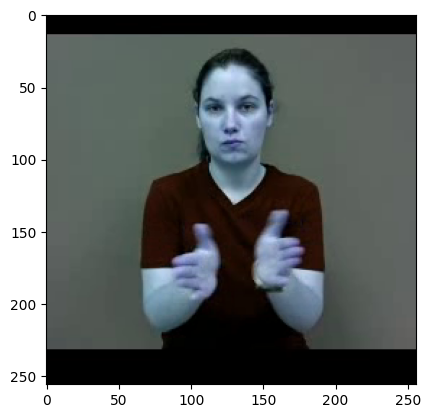

In [3]:
plt.imshow(img_test)
plt.show()

In [ ]:
mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside

# Create the holistic model
holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

I0000 00:00:1732386409.502477    3941 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732386409.509964    4443 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: GFX1103_R1 (gfx1103_r1, LLVM 15.0.7, DRM 3.57, 6.8.0-49-generic)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732386409.694299    4423 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732386409.780508    4422 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732386409.784076    4425 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732386409.789441    4423 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732386409.790383    4436 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732386409.807404    4

In [5]:
def open_image_detect_holistic(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convert cv2 image, which is BGR format, to RGB format
    img.flags.writeable = False     #To avoid bugs
    landmarks = holistic_model.process(img) #Process the image and generate the landmark points
    img.flags.writeable = True      #Reverse previous command
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  #Convert back to BGR format

    return img, landmarks #Return the image and the results from the holistic model

In [6]:
def draw_over_image(image, landmarks):
    mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside
    mp_draw = mp.solutions.drawing_utils #For drawing the results to verify the model is working
    #Draw Face
    mp_draw.draw_landmarks(image, landmarks.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                           mp_draw.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                           mp_draw.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1))
    
    #Draw pose
    mp_draw.draw_landmarks(image, landmarks.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(0,255,255), thickness=1, circle_radius=2))
    
    #Draw left hand
    mp_draw.draw_landmarks(image, landmarks.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(255,0,255), thickness=1, circle_radius=2))
    
    #Draw right hand
    mp_draw.draw_landmarks(image, landmarks.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                           mp_draw.DrawingSpec(color=(127,127,127), thickness=1, circle_radius=2),
                           mp_draw.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=2))
    
    plt.imshow(image)
    plt.show()

W0000 00:00:1732386420.982130    4435 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


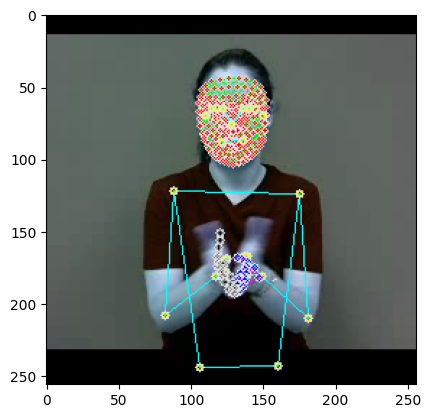

type

In [7]:
img, landmarks = open_image_detect_holistic('train/0/0/frames/0_25.png')
draw_over_image(img, landmarks)
type(landmarks)

Get the last pose landmark. Testing to see if this works

In [8]:
print(landmarks.pose_landmarks.landmark[len(landmarks.pose_landmarks.landmark)-1])

x: 0.471541792
y: 1.7528038
z: 0.311382502
visibility: 0.00376597699



This works. Now I can test a loop to get all these landmarks into a numpy list.

In [9]:
frame_pose_landmarks = []
for lm in landmarks.pose_landmarks.landmark:
    current_pose_landmark = np.array([lm.x, lm.y, lm.z, lm.visibility])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_pose_landmarks.append(current_pose_landmark)

In [10]:
frame_pose_landmarks_np = np.asarray(frame_pose_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_pose_landmarks_np.shape)
print(len(frame_pose_landmarks_np))

(33, 4)
33


There are 33 landmarks that make up the pose, and each landmark has 4 attributes (x,y,z,visibility).

I will now repeat this for the face, left hand, and right hand.

In [11]:
print(landmarks.face_landmarks.landmark[len(landmarks.face_landmarks.landmark)-1])

x: 0.56168896
y: 0.246274263
z: 0.00324537349



The face only has x,y,z attributes, so I will not be getting the visibility

In [12]:
frame_face_landmarks = []
for lm in landmarks.face_landmarks.landmark:
    current_face_landmark = np.array([lm.x, lm.y, lm.z])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_face_landmarks.append(current_face_landmark)

In [13]:
frame_face_landmarks_np = np.asarray(frame_face_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_face_landmarks_np.shape)
print(len(frame_face_landmarks_np))

(468, 3)
468


The face consists of 468 landmarks, and each landmark has 3 attributes (x,y,z).

In [14]:
print(landmarks.left_hand_landmarks.landmark[len(landmarks.left_hand_landmarks.landmark)-1])

x: 0.511461556
y: 0.74867171
z: -0.0132751977



Similar to the face landmarks, the left hand and the right hand landmarks, due to symmetry, have 3 attributes.

In [15]:
frame_left_hand_landmarks = []
for lm in landmarks.left_hand_landmarks.landmark:
    current_left_hand_landmark = np.array([lm.x, lm.y, lm.z])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_left_hand_landmarks.append(current_left_hand_landmark)

In [16]:
frame_left_hand_landmarks_np = np.asarray(frame_left_hand_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_left_hand_landmarks_np.shape)
print(len(frame_left_hand_landmarks_np))

(21, 3)
21


However, the left hand consists of only 21 landmarks, with each landmark having 3 attributes (x,y,z)

I expect the right hand to be the same

In [17]:
print(landmarks.right_hand_landmarks.landmark[len(landmarks.right_hand_landmarks.landmark)-1])

x: 0.511085749
y: 0.756257653
z: -0.0415751301



In [18]:
frame_right_hand_landmarks = []
for lm in landmarks.right_hand_landmarks.landmark:
    current_right_hand_landmark = np.array([lm.x, lm.y, lm.z])
    #CONTINUE --- Create a list and append each landmark array to it. Do error checking incase a landmark is not there or empty. Save numpy array (or later)
    frame_right_hand_landmarks.append(current_right_hand_landmark)

In [19]:
frame_right_hand_landmarks_np = np.asarray(frame_right_hand_landmarks) #Convert to numpy array to get shape and be able to save array.
print(frame_right_hand_landmarks_np.shape)
print(len(frame_right_hand_landmarks_np))

(21, 3)
21


As expected, the results from the right hand landmarks are the same as the left hand

To make the data one dimensional and easier to use, I will flatten it like we did in previous assignments

In [20]:
frame_right_hand_landmarks_np_flatten = frame_right_hand_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_right_hand_landmarks_np_flatten.shape)
print(len(frame_right_hand_landmarks_np_flatten))

(63,)
63


Now the data has only one dimension.

To make it even easier to use, I will flatten all arrays and concatenate them into one big array

In [21]:
frame_left_hand_landmarks_np_flatten = frame_left_hand_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_left_hand_landmarks_np_flatten.shape)
print(len(frame_left_hand_landmarks_np_flatten))

frame_face_landmarks_np_flatten = frame_face_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_face_landmarks_np_flatten.shape)
print(len(frame_face_landmarks_np_flatten))

frame_pose_landmarks_np_flatten = frame_pose_landmarks_np.flatten() #Flatten array so it's one dimensional and easier to use
print(frame_pose_landmarks_np_flatten.shape)
print(len(frame_pose_landmarks_np_flatten))

(63,)
63
(1404,)
1404
(132,)
132


In [22]:
landmarks_combined = np.concatenate([frame_face_landmarks_np_flatten, frame_left_hand_landmarks_np_flatten, frame_pose_landmarks_np_flatten, frame_right_hand_landmarks_np_flatten])
print(landmarks_combined.shape)
print(len(landmarks_combined))

(1662,)
1662


Now this one array contains all the landmarks

__NOTE:__ There is a small issue though. If the holistic model does not detect one of the pose, face, or hands, it will return None. This will mess up the shape of the input data and cause problems during training. So, if a model returns None for any detections, I will create an array of zeros instead.

For example, if I try the first frame of the first video:

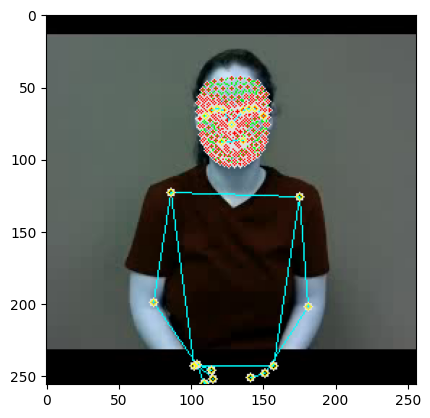

type

In [23]:
img, landmarks2 = open_image_detect_holistic('train/0/0/frames/0_1.png')
draw_over_image(img, landmarks2)
type(landmarks2)

As seen in the above image, there are no hand landmarks. So if I try to get the results for the hand landmarks, I should get None:

In [24]:
print(landmarks2.left_hand_landmarks is None)
print(landmarks2.right_hand_landmarks is None)
print(landmarks2.pose_landmarks is None)
print(landmarks2.face_landmarks is None)

True
True
False
False


In [25]:
print(len(landmarks2.face_landmarks.landmark))

468


As seen here, there are no left and right hand landmarks detected, but there are face and pose landmarks. So, I want to replace the left and right hand landmarks with an array of zeros instead of a None object

In [26]:
f_rh_lm = []
if landmarks2.right_hand_landmarks is None:
    f_rh_lm = np.zeros((21,3))
else:
    for lm in landmarks2.right_hand_landmarks.landmark:
        c_rh_lm = np.array([lm.x, lm.y, lm.z])
        f_rh_lm.append(c_rh_lm)
f_rh_lm_np = np.array(f_rh_lm)
print(f_rh_lm_np.shape)
print(f_rh_lm_np)

(21, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


This way, the numpy arrays will all be the same for every frame

So, in summary, the different landmarks are as follows:
- Face landmarks: 468 landmarks, each landmark has 3 attributes -> x, y, z
- Pose landmarks: 33 landmarks, each landmark has 4 attributes -> x, y, z, visibility
- left hand landmarks: 21 landmarks, each landmark has 3 attributes -> x, y ,z
- right hand landmark: 21 landmarks, each landmark has 3 attributes -> x, y ,z

Total combined: 1662 landmark data points

In [27]:
def retrieve_landmarks(landmark_results):
    f_p_lm = []
    f_f_lm = []
    f_lh_lm = []
    f_rh_lm = []
    
    if landmark_results.pose_landmarks is None:
        f_p_lm = np.zeros((33,4))
    else:
        for lm in landmark_results.pose_landmarks.landmark:
            c_p_lm = np.array([lm.x, lm.y, lm.z, lm.visibility])
            f_p_lm.append(c_p_lm)

    if landmark_results.face_landmarks is None:
        f_f_lm = np.zeros((468,3))
    else:
        for lm in landmark_results.face_landmarks.landmark:
            c_f_lm = np.array([lm.x, lm.y, lm.z])
            f_f_lm.append(c_f_lm)

    if landmark_results.left_hand_landmarks is None:
        f_lh_lm = np.zeros((21,3))
    else:
        for lm in landmark_results.left_hand_landmarks.landmark:
            c_lh_lm = np.array([lm.x, lm.y, lm.z])
            f_lh_lm.append(c_lh_lm)

    if landmark_results.right_hand_landmarks is None:
        f_rh_lm = np.zeros((21,3))
    else:
        for lm in landmark_results.right_hand_landmarks.landmark:
            c_rh_lm = np.array([lm.x, lm.y, lm.z])
            f_rh_lm.append(c_rh_lm)

    #Convert all arrays to numpy arrays
    f_p_lm_np = np.asarray(f_p_lm)
    f_f_lm_np = np.asarray(f_f_lm)
    f_lh_lm_np = np.asarray(f_lh_lm)
    f_rh_lm_np = np.asarray(f_rh_lm)

    #For debugging
    print(f_p_lm_np.shape)
    print(f_f_lm_np.shape)
    print(f_lh_lm_np.shape)
    print(f_rh_lm_np.shape)

    #Flatten all arrays so there are less dimensions to deal with
    f_p_lm_np_flat = f_p_lm_np.flatten()
    f_f_lm_np_flat = f_f_lm_np.flatten()
    f_lh_lm_np_flat = f_lh_lm_np.flatten()
    f_rh_lm_np_flat = f_rh_lm_np.flatten()

    #Combine all landmarks to one big array.
    return np.concatenate([f_p_lm_np_flat, f_f_lm_np_flat, f_lh_lm_np_flat, f_rh_lm_np_flat])


I will now test this

In [28]:
lms_combined = retrieve_landmarks(landmarks)
print(lms_combined.shape)

lms2_combined = retrieve_landmarks(landmarks2)
print(lms2_combined.shape)

(33, 4)
(468, 3)
(21, 3)
(21, 3)
(1662,)
(33, 4)
(468, 3)
(21, 3)
(21, 3)
(1662,)


In [29]:
print(lms_combined[1536:1662])
print(lms2_combined[1536:1662])

[ 5.74284077e-01  7.10944772e-01 -2.25607380e-07  5.65736949e-01
  6.84991360e-01 -2.02746852e-03  5.46173751e-01  6.69128120e-01
 -4.88910917e-03  5.28122365e-01  6.61316395e-01 -8.15823860e-03
  5.16630590e-01  6.60043776e-01 -1.24287568e-02  5.42341232e-01
  6.79723024e-01 -7.35105015e-03  5.36577463e-01  6.89897656e-01
 -1.46628534e-02  5.31716645e-01  6.98317885e-01 -2.30474360e-02
  5.26292622e-01  7.03060269e-01 -2.88427547e-02  5.40133834e-01
  7.00380921e-01 -9.97683965e-03  5.35663009e-01  7.11140156e-01
 -1.40391178e-02  5.28899848e-01  7.16772437e-01 -1.94734801e-02
  5.22287726e-01  7.17805684e-01 -2.51061302e-02  5.36930025e-01
  7.19631374e-01 -1.23848412e-02  5.28789282e-01  7.28965163e-01
 -1.72413327e-02  5.22930741e-01  7.32240319e-01 -1.91737656e-02
  5.16970217e-01  7.32412279e-01 -2.15412509e-02  5.32595754e-01
  7.38089383e-01 -1.47016123e-02  5.20894289e-01  7.48831272e-01
 -1.70991942e-02  5.15873313e-01  7.50614524e-01 -1.45416372e-02
  5.11461556e-01  7.48671

So the second frame that does not have left and right hand landmarks now has landmark points but there are 0. While the first image that has left and right hand landmarks has actual values.

Next, I want to save these arrays so I can load them later for training. Numpy has a function called save() that takes in the file name and array to save:

For example, I will save the array for the first image I tested above

In [30]:
np.save('test_saving_np.npy', lms_combined)

Now I can load this and verify that the data has been saved correctly

In [31]:
load_lms_combined = np.load('test_saving_np.npy')
print(load_lms_combined.shape)
print(load_lms_combined[1536:1662])

(1662,)
[ 5.74284077e-01  7.10944772e-01 -2.25607380e-07  5.65736949e-01
  6.84991360e-01 -2.02746852e-03  5.46173751e-01  6.69128120e-01
 -4.88910917e-03  5.28122365e-01  6.61316395e-01 -8.15823860e-03
  5.16630590e-01  6.60043776e-01 -1.24287568e-02  5.42341232e-01
  6.79723024e-01 -7.35105015e-03  5.36577463e-01  6.89897656e-01
 -1.46628534e-02  5.31716645e-01  6.98317885e-01 -2.30474360e-02
  5.26292622e-01  7.03060269e-01 -2.88427547e-02  5.40133834e-01
  7.00380921e-01 -9.97683965e-03  5.35663009e-01  7.11140156e-01
 -1.40391178e-02  5.28899848e-01  7.16772437e-01 -1.94734801e-02
  5.22287726e-01  7.17805684e-01 -2.51061302e-02  5.36930025e-01
  7.19631374e-01 -1.23848412e-02  5.28789282e-01  7.28965163e-01
 -1.72413327e-02  5.22930741e-01  7.32240319e-01 -1.91737656e-02
  5.16970217e-01  7.32412279e-01 -2.15412509e-02  5.32595754e-01
  7.38089383e-01 -1.47016123e-02  5.20894289e-01  7.48831272e-01
 -1.70991942e-02  5.15873313e-01  7.50614524e-01 -1.45416372e-02
  5.11461556e-01 

So, this works. Now I can do this for every frame in the video. The steps are:
1. Go through every image in the word range I want
2. Pass image file path to open_image_detect_holistic() function.
3. Capture the returned landmark results from the function called in step 1
4. Pass the landmark results to the retrieve_landmarks() function
5. Capture the result of the function called in step 3. Which is one array that has all landmark points for that image.
6. Save the numpy array to a file in the directory of the instance
7. Repeat steps 2-6 for every image

In [32]:
def words_frames_to_points(split_type = 'train', start_word = 0, end_word = 1):
    count = 0
    for root, dirs, files in os.walk(split_type):
        for file_name in files:
            if file_name.endswith('.png'):
                root_split = root.split('/')
                word_id = root_split[1]
                if int(word_id) >= start_word and int(word_id) < end_word:
                    file_name_split = file_name.split('.')
                    #print(word_id)
                    #print(file_name, root)
                    frame_path = os.path.join(root, file_name)
                    #print(f'Frame path {frame_path}')
                    directory_path = root_split[0] + '/' + root_split[1] + '/' + root_split[2] + '/points_arrays/'
                    if not os.path.exists(directory_path):
                        print(f'No directory called {directory_path}. Creating one now')
                        os.makedirs(directory_path)
                    new_path = directory_path + file_name_split[0] + '.npy'
                    #print(new_path + '\n')
                    img, img_lm = open_image_detect_holistic(frame_path)
                    lms_frame = retrieve_landmarks(img_lm)
                    np.save(new_path, lms_frame)
                    print(f'Numpy array for frame {frame_path} has been saved to {new_path}')
                    count = count + 1
    print(f'{count} frames have been converted to numpy arrays of landmark points')
    return count

In [33]:
count_lm_saved = words_frames_to_points()

No directory called train/0/19/points_arrays/. Creating one now
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_14.png has been saved to train/0/19/points_arrays/19_14.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_16.png has been saved to train/0/19/points_arrays/19_16.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_2.png has been saved to train/0/19/points_arrays/19_2.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_15.png has been saved to train/0/19/points_arrays/19_15.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_23.png has been saved to train/0/19/points_arrays/19_23.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_13.png has been saved to train/0/19/points_arrays/19_13.npy
(33, 4)
(468, 3)
(21, 3)
(21, 3)
Numpy array for frame train/0/19/frames/19_11.png has been saved to train/0/19/points_arr

In [34]:
print(count_lm_saved)

2231


Now, I can run all of these functions to extract video information from the JSON file, copy videos to the corresponding split type directory, extract frames, and then extract landmark points and save them. To do this, I will create a class called PreProcessASL

In [ ]:
import json
import os
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [ ]:
class PreProcessASL():
    def __init__(self):
        # Open JSON file
        with open('WLASL/WLASL_v0.3.json', 'r') as file:
            self.data = json.load(file)

        # Create holistic model
        mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside

        # Create the holistic model
        self.holistic_model = mp_holistic.Holistic(
            min_detection_confidence=0.5,
            min_tracking_confidence=0.5
        )
    
    def _copy_video(self, directory_path, video_id):
        if not os.path.exists(directory_path):
            print(f'No directory called {directory_path}. Creating one now')
            os.makedirs(directory_path)

        copy_command = 'cp WLASL/videos/' + video_id + '.mp4' + ' ' + directory_path + '/' + video_id + '.mp4'
        os.system(copy_command)
    
    def organize_words(self, end_word, start_word=0):
        for word_id in range(start_word, end_word):
            train_instance = 0
            test_instance = 0
            val_instance = 0
            for instance in range(0,len(self.data[word_id]['instances'])):
                video_id = self.data[word_id]['instances'][instance]['video_id']
                split_type = self.data[word_id]['instances'][instance]['split']
                match split_type:
                    case 'train':
                        directory_path = os.path.join(split_type, str(word_id), str(train_instance))
                        copy_video(directory_path, video_id)
                        train_instance += 1
                    case 'test':
                        directory_path = os.path.join(split_type, str(word_id), str(test_instance))
                        copy_video(directory_path, video_id)
                        test_instance += 1
                    case 'val':
                        directory_path = os.path.join(split_type, str(word_id), str(val_instance))
                        copy_video(directory_path, video_id)
                        val_instance += 1
    
    def crop_video_frames(self, video_path, start_time=0.0, end_time=0.0):
        cap = cv2.VideoCapture(video_path)
        video_path_parts = video_path.split('/')
        video_id = video_path_parts[3]
        video_dir = video_path_parts[0] + '/' + video_path_parts[1] + '/' + video_path_parts[2]
        video_output = os.path.join(f'{video_dir}', f'{video_id}_cropped.mp4')

        fps = int(cap.get(cv2.CAP_PROP_FPS))
        frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if start_time < 0:
            start_frame = int(frames_total + int(start_time * fps))
        else:
            start_frame = int(fps * start_time)
        
        if end_time < 0:
            end_frame = int(frames_total + int(end_time * fps))
        elif end_time == 0:
            end_frame = frames_total
        else:
            end_frame = int(fps * end_time)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        #print(str(start_frame))
        #print(str(end_frame))
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
        frame_num = start_frame
        video = cv2.VideoWriter(video_output, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

        while True:
            # Read next frame
            ret, frame = cap.read()

            # If no more frames, stop.
            if not ret:
                break

            # increment frame number
            frame_num += 1

            if frame_num < end_frame:
                # Video writer to create mp4 file
                video.write(frame)

        # Release the video file
        video.release()
        cap.release()
        cv2.destroyAllWindows()
        print(f"Video generated successfully to {video_output}. Video is {end_frame - start_frame} frames long")

    def _save_video_frames(self, video_path, output_path):
        cap = cv2.VideoCapture(video_path)

        if not os.path.exists(output_path):
            print(f'No directory called {output_path}. Creating one now')
            os.makedirs(output_path)

        frame_num = 0

        while True:
            # Read next frame
            ret, frame = cap.read()

            # If no more frames, stop.
            if not ret:
                break

            # increment frame number
            frame_num += 1

            # Save frame
            output_str_split = output_path.split('/')
            instance_id = output_str_split[2]
            frame_path = os.path.join(output_path, f'{instance_id}_{frame_num}.png')
            
            if not os.path.exists(output_path):
                print(f'No directory called {output_path}. Creating one now')
                os.makedirs(output_path)

            cv2.imwrite(frame_path, frame)

            #print(f'Frame {frame_num} has been saved to {frame_path}')
        
        # Release video capture
        cap.release()
        print(f'All {frame_num+1} frames for the video at {video_path} have been successfully saved')
        # Return how many frames make up the video
        return frame_num+1
    
    def save_mult_video_frames(self, split_type='train', start_word=0, end_word=1):
        frames = []
        for root, dirs, files in os.walk(split_type):
            for file_name in files:
                if file_name.endswith('.mp4'):
                    #print(file_name, dirs, root)
                    #print(os.path.join(root, file_name))
                    word_id = root.split('/')[1]
                    if int(word_id) >= start_word and int(word_id) < end_word:
                        video_frames = save_video_frames(f'{os.path.join(root, file_name)}', f'{os.path.join(root, "frames")}')
                        frames.append(video_frames)
                        #print(f'{os.path.join(root, file_name)}, word: {data[int(word_id)]["gloss"]}')
        return frames
    
    def open_image_detect_holistic(self, image_path):
        img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convert cv2 image, which is BGR format, to RGB format
        img.flags.writeable = False     #To avoid bugs
        landmarks = holistic_model.process(img) #Process the image and generate the landmark points
        img.flags.writeable = True      #Reverse previous command
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  #Convert back to BGR format

        return img, landmarks #Return the image and the results from the holistic model
    
    def draw_over_image(self, image, landmarks):
        mp_holistic = mp.solutions.holistic #Used to get the Holistic class inside
        mp_draw = mp.solutions.drawing_utils #For drawing the results to verify the model is working
        #Draw Face
        mp_draw.draw_landmarks(image, landmarks.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                            mp_draw.DrawingSpec(color=(255,0,0), thickness=1, circle_radius=1),
                            mp_draw.DrawingSpec(color=(0,255,0), thickness=1, circle_radius=1))
        
        #Draw pose
        mp_draw.draw_landmarks(image, landmarks.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_draw.DrawingSpec(color=(255,255,0), thickness=1, circle_radius=2),
                            mp_draw.DrawingSpec(color=(0,255,255), thickness=1, circle_radius=2))
        
        #Draw left hand
        mp_draw.draw_landmarks(image, landmarks.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_draw.DrawingSpec(color=(0,0,255), thickness=1, circle_radius=2),
                            mp_draw.DrawingSpec(color=(255,0,255), thickness=1, circle_radius=2))
        
        #Draw right hand
        mp_draw.draw_landmarks(image, landmarks.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_draw.DrawingSpec(color=(127,127,127), thickness=1, circle_radius=2),
                            mp_draw.DrawingSpec(color=(0,0,0), thickness=1, circle_radius=2))
        
        plt.imshow(image)
        plt.show()

    def retrieve_landmarks(self, landmark_results):
        f_p_lm = []
        f_f_lm = []
        f_lh_lm = []
        f_rh_lm = []
        
        if landmark_results.pose_landmarks is None:
            f_p_lm = np.zeros((33,4))
        else:
            for lm in landmark_results.pose_landmarks.landmark:
                c_p_lm = np.array([lm.x, lm.y, lm.z, lm.visibility])
                f_p_lm.append(c_p_lm)

        if landmark_results.face_landmarks is None:
            f_f_lm = np.zeros((468,3))
        else:
            for lm in landmark_results.face_landmarks.landmark:
                c_f_lm = np.array([lm.x, lm.y, lm.z])
                f_f_lm.append(c_f_lm)

        if landmark_results.left_hand_landmarks is None:
            f_lh_lm = np.zeros((21,3))
        else:
            for lm in landmark_results.left_hand_landmarks.landmark:
                c_lh_lm = np.array([lm.x, lm.y, lm.z])
                f_lh_lm.append(c_lh_lm)

        if landmark_results.right_hand_landmarks is None:
            f_rh_lm = np.zeros((21,3))
        else:
            for lm in landmark_results.right_hand_landmarks.landmark:
                c_rh_lm = np.array([lm.x, lm.y, lm.z])
                f_rh_lm.append(c_rh_lm)

        #Convert all arrays to numpy arrays
        f_p_lm_np = np.asarray(f_p_lm)
        f_f_lm_np = np.asarray(f_f_lm)
        f_lh_lm_np = np.asarray(f_lh_lm)
        f_rh_lm_np = np.asarray(f_rh_lm)

        #For debugging
        print(f_p_lm_np.shape)
        print(f_f_lm_np.shape)
        print(f_lh_lm_np.shape)
        print(f_rh_lm_np.shape)

        #Flatten all arrays so there are less dimensions to deal with
        f_p_lm_np_flat = f_p_lm_np.flatten()
        f_f_lm_np_flat = f_f_lm_np.flatten()
        f_lh_lm_np_flat = f_lh_lm_np.flatten()
        f_rh_lm_np_flat = f_rh_lm_np.flatten()

        #Combine all landmarks to one big array.
        return np.concatenate([f_p_lm_np_flat, f_f_lm_np_flat, f_lh_lm_np_flat, f_rh_lm_np_flat])
    
    def words_frames_to_points(self, split_type = 'train', start_word = 0, end_word = 1):
        count = 0
        for root, dirs, files in os.walk(split_type):
            for file_name in files:
                if file_name.endswith('.png'):
                    root_split = root.split('/')
                    word_id = root_split[1]
                    if int(word_id) >= start_word and int(word_id) < end_word:
                        file_name_split = file_name.split('.')
                        #print(word_id)
                        #print(file_name, root)
                        frame_path = os.path.join(root, file_name)
                        #print(f'Frame path {frame_path}')
                        directory_path = root_split[0] + '/' + root_split[1] + '/' + root_split[2] + '/points_arrays/'
                        if not os.path.exists(directory_path):
                            print(f'No directory called {directory_path}. Creating one now')
                            os.makedirs(directory_path)
                        new_path = directory_path + file_name_split[0] + '.npy'
                        #print(new_path + '\n')
                        img, img_lm = open_image_detect_holistic(frame_path)
                        lms_frame = retrieve_landmarks(img_lm)
                        np.save(new_path, lms_frame)
                        print(f'Numpy array for frame {frame_path} has been saved to {new_path}')
                        count = count + 1
        print(f'{count} frames have been converted to numpy arrays of landmark points')
        return count